# Binary Classification

## Minimizing Customer Attrition

## Using Linear Probability Models to Find High-Risk Customers

In [ ]:
#reading in the attrition_past dataset

import pandas as pd

attrition_past = pd.read_csv('attrition_past.csv')
attrition_past.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0
3,acme,101,10983,2,1
4,qwer,0,118,42,1


## Plotting Attrition Risk

In [ ]:
print(attrition_past["exited"].mean())

0.5769230769230769


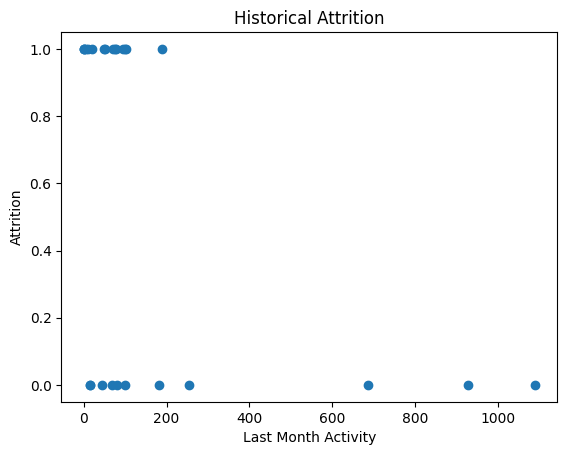

In [ ]:
#plotting a scatter plot of lastmonth_activity vs exited in the dataset

import matplotlib.pyplot as plt

plt.scatter(attrition_past["lastmonth_activity"], attrition_past["exited"])
plt.title("Historical Attrition")
plt.xlabel("Last Month Activity")
plt.ylabel("Attrition")
plt.show()

## Confirming Relationships with Linear Regression

In [ ]:
#performing linear regression on lastmonth_activity vs exited

from sklearn.linear_model import LinearRegression

x = attrition_past["lastmonth_activity"].values.reshape(-1,1)
y = attrition_past["exited"].values.reshape(-1,1)
regressor = LinearRegression()

regressor.fit(x,y)

LinearRegression()

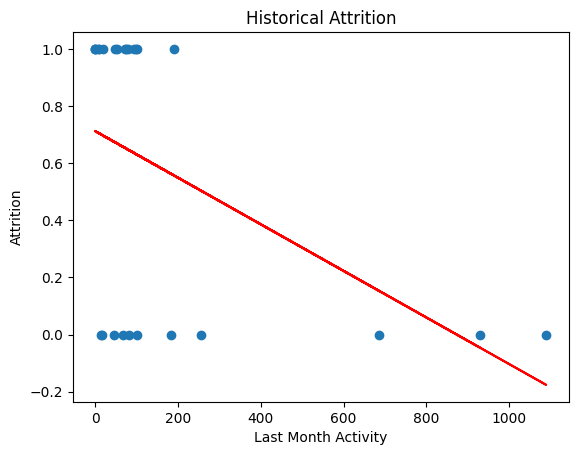

In [ ]:
#plotting our regressor line on the scatter plot of lastmonth_activity vs exited


plt.scatter(attrition_past["lastmonth_activity"], attrition_past["exited"])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in list(attrition_past["lastmonth_activity"])]
plt.plot(attrition_past["lastmonth_activity"], prediction, color = 'red')
plt.title("Historical Attrition")
plt.xlabel("Last Month Activity")
plt.ylabel("Attrition")
plt.show()

In [ ]:
#creating a new col in our dataset called predicted that shows the exit risk for each client

attrition_past["predicted"] = regressor.predict(x)

## Predicting the future

In [ ]:
#reading the attrition2 dataset

attrition_future = pd.read_csv('attrition2.csv')

In [ ]:
#making prediction on the new attrition_future dataset using the lastmonth_activity col

attrition_future["predicted"] = regressor.predict(attrition_future["lastmonth_activity"].values.reshape(-1,1))

## Making Business Recommendations

In [ ]:
#Creating a list of the top 5 client most likely to chrun

print(attrition_future.nlargest(5, "predicted"))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
24        pian                   0                 12                   19   
21        bass                   2                 19                 1400   
4         dmai                   4                 94                    2   

    predicted  
8    0.711936  
12   0.711936  
24   0.711936  
21   0.710306  
4    0.708676  


In [ ]:
#creating a list of client from highest to lowest attrition probably risk

print(attrition_future.sort_values("predicted", ascending = False))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
24        pian                   0                 12                   19   
12        mike                   0                  0                   49   
21        bass                   2                 19                 1400   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   
10        kdic                  12                 42                    3   
25        hlpd                  12                149                  226   
17        angl                  13                 14                  182   
14        erin                  14                350                    1   
9         oscr                  14                282           

## Measuring Prediction Accuracy

In [ ]:
#creating lists of our predictions and actual values

themedian = attrition_past["predicted"].median()
prediction = list(1*(attrition_past["predicted"]>themedian) )
actual = list(attrition_past["exited"])

In [ ]:
#creating a confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(prediction, actual))

[[7 6]
 [4 9]]


In [ ]:
#calculating precision and recall

from sklearn.metrics import precision_score, recall_score

print(precision_score(prediction, actual))
print(recall_score(prediction, actual))

0.6
0.6923076923076923


## Using multivariate LPMs

In [ ]:
#creating a regession of lastmonth_activity lastyear_activity and number_of_employees vs exited


x3 = attrition_past[["lastmonth_activity", "lastyear_activity", "number_of_employees"]].values.reshape(-1,3)
y = attrition_past["exited"].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x3,y)

LinearRegression()

In [ ]:
#creating a new col predicted_multi from the newly predicted values

attrition_future["predicted_multi"] = regressor.predict(x3)

In [ ]:
#sorting attrition_future in descending order by predicted_multi

print(attrition_future.sort_values("predicted_multi", ascending = False))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   
20        wlcj                 158               2813                    6   
17        angl                  13                 14                  182   
24        pian                   0                 12                   19   
1         slfm                 824              16920                  288   
25        hlpd                  12                149                  226   
6         frgv                  80                954                 1280   
23        hlly                  45                468           

In [ ]:
#creating a new feature activity_per_employee

attrition_future["activity_per_employee"] = attrition_future["lastmonth_activity"]/attrition_future["number_of_employees"]

In [ ]:
#creating a new regression with the newly created variable
attrition_past["activity_per_employee"] = attrition_past["lastmonth_activity"]/attrition_past["number_of_employees"]
x4 = attrition_past[["lastmonth_activity", "lastyear_activity", "number_of_employees", "activity_per_employee"]].values.reshape(-1,4)
regressor = LinearRegression()
regressor.fit(x4,y)

x5 = attrition_future[["lastmonth_activity", "lastyear_activity", "number_of_employees", "activity_per_employee"]].values.reshape(-1,4)

attrition_future["predicted3"] = regressor.predict(x5)
attrition_past["predicted3"] = regressor.predict(x5)



In [ ]:
#print the sorted attrition_future by predicted3

print(attrition_future.sort_values("predicted3", ascending = False))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
13        pevc                   4                  6                 1686   
21        bass                   2                 19                 1400   
6         frgv                  80                954                 1280   
25        hlpd                  12                149                  226   
17        angl                  13                 14                  182   
9         oscr                  14                282                  113   
18        zamk                  29                868                   99   
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
0         hhtn                 166               1393                   91   
11        ejdc                  95               1005                   61   
7         grce                  24                 34           

In [ ]:
#creating the confusion matrix

themedian = attrition_past["predicted3"].median()
prediction = list(1*(attrition_past["predicted3"]>themedian) )
actual = list(attrition_past["exited"])
print(confusion_matrix(prediction, actual))

[[ 9  4]
 [ 2 11]]


In [ ]:
#displaying the precision and recall

print(precision_score(prediction, actual))
print(recall_score(prediction, actual))

0.7333333333333333
0.8461538461538461


## Predicting Binary Outcome with Logistic Regression

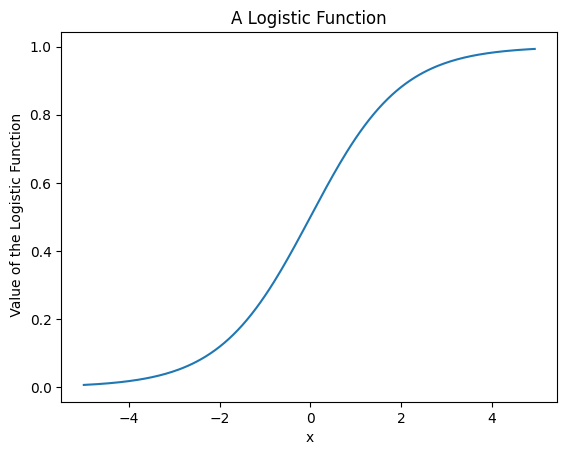

In [ ]:
#Drawing logistic Curves

from matplotlib import pyplot as plt
import numpy as np
import math

x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(-x)))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel(" Value of the Logistic Function")
plt.title("A Logistic Function")
plt.show()


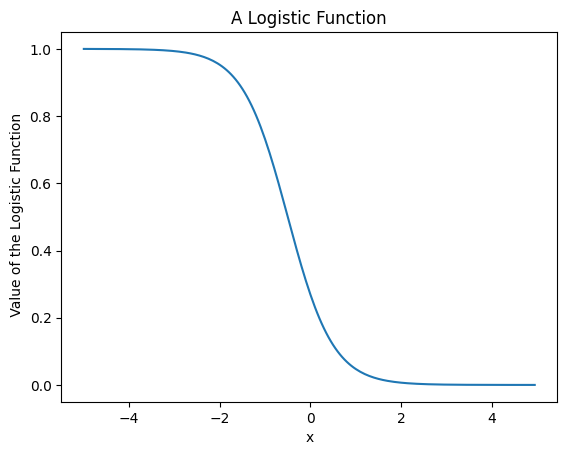

In [ ]:
x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel(" Value of the Logistic Function")
plt.title("A Logistic Function")
plt.show()

## Fitting the Logistic Function to Our Data

In [ ]:
#Performing logistic regression on the attrition_past dataset on lastmonth_activity and exited

from sklearn.linear_model import LogisticRegression

x = attrition_past["lastmonth_activity"].values.reshape(-1,1)
y = attrition_past["exited"]
model = LogisticRegression(solver= "liblinear",random_state=0)
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#creating a new col named logisticprediction with the predicted probabilites

attrition_past["logisticprediction"] = model.predict_proba(x)[:,1]

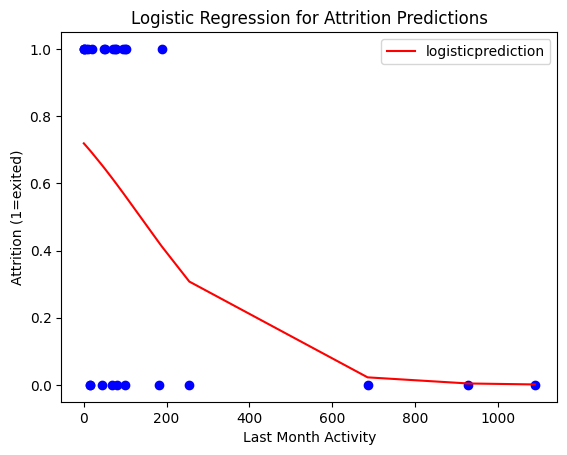

In [ ]:
#creating a scatter plot of lastmonth_activity vs exited with the logistic regression line sorted in reverse order

fig =  plt.scatter(attrition_past["lastmonth_activity"], attrition_past["exited"] , color = "blue")
attrition_past.sort_values("lastmonth_activity").plot(x = "lastmonth_activity", y = "logisticprediction", ax = fig.axes, color = "red")
plt.title("Logistic Regression for Attrition Predictions")
plt.xlabel("Last Month Activity")
plt.ylabel("Attrition (1=exited)")
plt.show()


In [ ]:
#creating a col in attrition_future named logisticprediction

x = attrition_future["lastmonth_activity"].values.reshape(-1,1)
attrition_future["logisticprediction"] = model.predict_proba(x)[:,1]

In [ ]:
#Print the list of attrition_future sorted by logisticprediction in descedening order

print(attrition_future.sort_values("logisticprediction", ascending = False))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
24        pian                   0                 12                   19   
12        mike                   0                  0                   49   
21        bass                   2                 19                 1400   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   
10        kdic                  12                 42                    3   
25        hlpd                  12                149                  226   
17        angl                  13                 14                  182   
14        erin                  14                350                    1   
9         oscr                  14                282           